In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("TATAMOTORS__short.csv")   # change filename if needed
print(df.head())

                   timestamp   open   high     low   close  volume
0  2017-01-02 09:15:00+05:30  472.0  473.0  471.35  472.00   28096
1  2017-01-02 09:16:00+05:30  472.0  473.0  472.00  472.85   16635
2  2017-01-02 09:17:00+05:30  472.6  473.0  470.95  470.95   13810
3  2017-01-02 09:18:00+05:30  471.0  471.7  470.50  471.50   13836
4  2017-01-02 09:19:00+05:30  471.5  473.3  471.50  473.00   19115


In [3]:
# Independent variables
X = df[['open', 'high', 'low', 'volume']]

# Dependent variable
y = df['close']

In [4]:
# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Step 4: Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Step 5: Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [7]:
# Step 6: Evaluation Metrics - Training Data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

In [8]:
# Step 8: Regression Equation
# ---------------------------------------------------
print("\nRegression Equation:")
print("Close =")
for coef, col in zip(model.coef_, X.columns):
    print(f"  ({coef:.4f} * {col})")
print(f"+ {model.intercept_:.4f}")


Regression Equation:
Close =
  (-0.5267 * open)
  (0.7633 * high)
  (0.7629 * low)
  (0.0000 * volume)
+ 0.2466


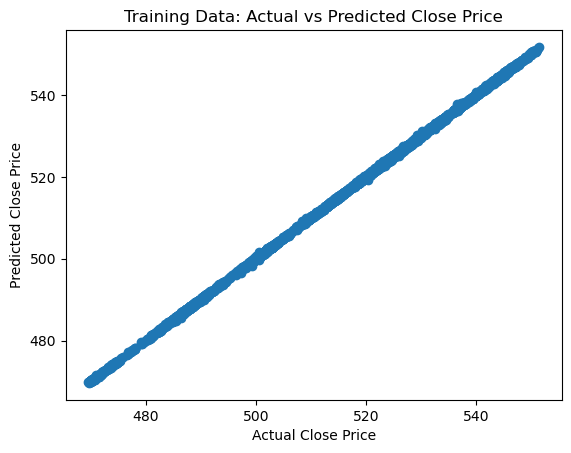

In [9]:
# Step 9: Training Data Graph
# ---------------------------------------------------
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Training Data: Actual vs Predicted Close Price")
plt.show()

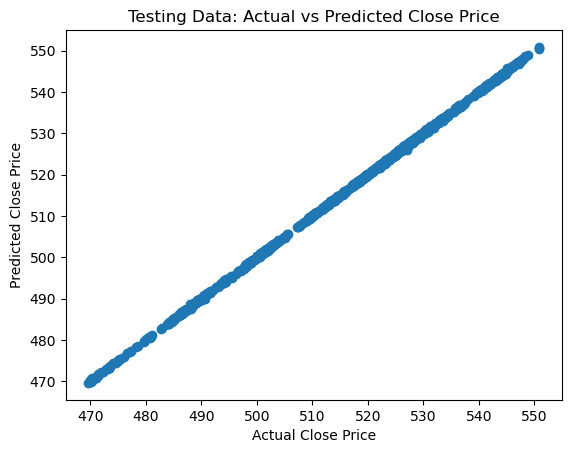

In [10]:
# Step 10: Testing Data Graph
# ---------------------------------------------------
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Testing Data: Actual vs Predicted Close Price")
plt.show()

In [11]:
# Step 11: Prediction for New Data
new_data = pd.DataFrame(
    [[472, 473, 471.5, 20000]],
    columns=['open', 'high', 'low', 'volume']
)

predicted_close = model.predict(new_data)

print("\nPredicted Close Price for new data:", predicted_close[0])


Predicted Close Price for new data: 472.40870989809576


In [12]:
# Step 7: Evaluation Metrics 
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\n========== Testing Data Metrics ==========")
print("MAE :", test_mae)
print("MSE :", test_mse)
print("RMSE:", test_rmse)
print("R²  :", test_r2)


========== Testing Data Metrics ==========
MAE : 0.12212292341829133
MSE : 0.02561490196450707
RMSE: 0.16004656186406213
R²  : 0.999929909656753
